In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [88]:
data = pd.read_csv('stock.csv')

In [89]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [90]:
data.shape

(619040, 7)

In [91]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [92]:
data['date'] = pd.to_datetime(data['date'])

In [93]:
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

In [94]:
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data['dow_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['dow_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

In [95]:
data = data.drop(columns = ['date','month','day','day_of_week'])

In [96]:
data.isna().sum()

open         11
high          8
low           8
close         0
volume        0
Name          0
month_sin     0
month_cos     0
day_sin       0
day_cos       0
dow_sin       0
dow_cos       0
dtype: int64

In [97]:
data = data.dropna()

In [98]:
data.isna().sum()

open         0
high         0
low          0
close        0
volume       0
Name         0
month_sin    0
month_cos    0
day_sin      0
day_cos      0
dow_sin      0
dow_cos      0
dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])

In [101]:
data.describe()

,open,high,low,close,volume,Name,month_sin,month_cos,day_sin,day_cos,dow_sin,dow_cos
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05,619029.000000,6.190290e+05,6.190290e+05,6.190290e+05,619029.000000,619029.000000,619029.000000
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06,252.907171,-1.206101e-02,-8.792460e-03,7.672752e-03,-0.027502,0.362065,-0.090355
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06,145.900892,7.071184e-01,7.069387e-01,7.153658e-01,0.698168,0.515828,0.771147
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02,0.000000,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-0.433884,-0.900969
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06,126.000000,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.758758,0.000000,-0.900969
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06,255.000000,-2.449294e-16,-1.836970e-16,-2.449294e-16,-0.050649,0.433884,-0.222521
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06,379.000000,5.000000e-01,5.000000e-01,7.247928e-01,0.688967,0.781831,0.623490
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,504.000000,1.000000e+00,1.000000e+00,9.987165e-01,1.000000,0.974928,1.000000


<Axes: >

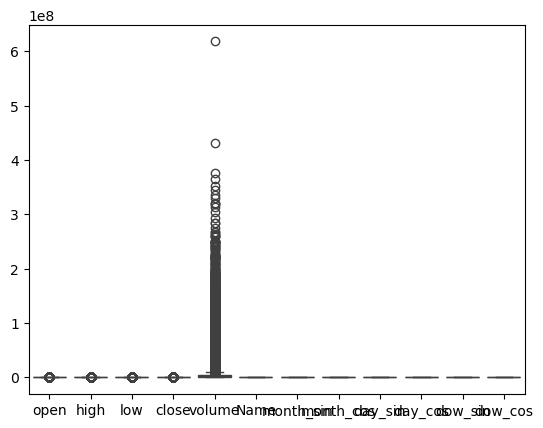

In [102]:
sns.boxplot(data)

In [103]:
from scipy import stats

In [104]:
z_score = np.abs(stats.zscore(data['volume']))
data = data[(z_score<3)]

<Axes: >

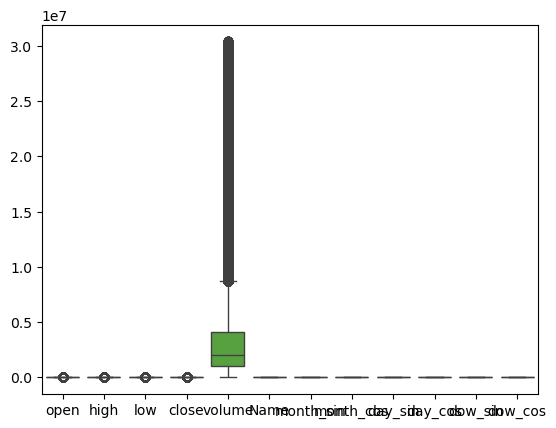

In [105]:
sns.boxplot(data)

In [106]:
data.shape

(609459, 12)

In [107]:
x = data.drop(columns = ['close'])
y = data['close']

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 2)

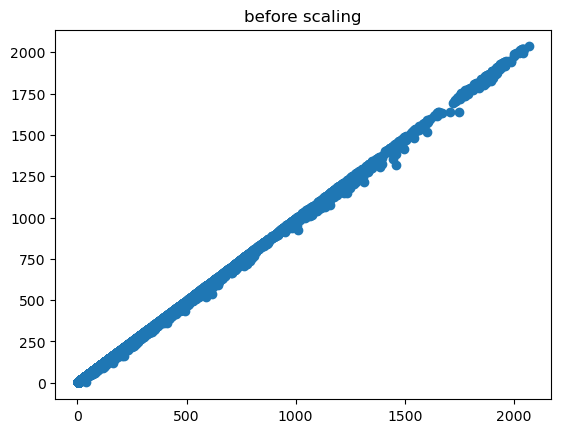

In [109]:
plt.scatter(x_train['high'],x_train['low'])
plt.title('before scaling')
plt.show()

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

xgb = XGBRegressor()
xgb.fit(x_train,y_train)

In [ ]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = gb.predict(x_test)
y_pred4 = xgb.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score1 = r2_score(y_test,y_pred1)
score2 = r2_score(y_test,y_pred2)
score3 = r2_score(y_test,y_pred3)
score4 = r2_score(y_test,y_pred4)

In [ ]:
print(score1,score2,score3,score4)

In [ ]:
plt.figure(figsize = (50,20))
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [ ]:
vel = pd.DataFrame({'model':['lr','rf','gb','xgb'],'r2_score':[score1,score2,score3,score4]})

In [ ]:
vel

In [ ]:
sns.barplot(x = vel['model'],y = vel['r2_score'])

In [ ]:
import joblib

In [ ]:
lr = LinearRegression()
lr = lr.fit(x,y)

In [ ]:
joblib.dump(lr,'stock_price_prediction')

In [ ]:
model = joblib.load('stock_price_prediction')

In [ ]:
new = pd.DataFrame({
    'open':15.07,
    'high':15.12,
    'low':14.63,
    'volume':8407500,
    'Name':1,
    'month_sin':0.866025,
    'month_cos':0.5,
    'day_sign':0.998717,
    'day_cos':-0
})

In [ ]:
data.head()